# Project Title- Predict Fake Currency Detection using Classification Algorithms

# Multiple Classification Model Python and Scikit-Learn

This project is about Multiple Classification Model which is a machine learning algorithm. I build a multiple Classification model to Predict Fake Currency Detection using Classification Algorithms .

# Table of contents
The contents of this project are divided into various categories which are given as follows:-

1.Import the Python libraries

2.Import the dataset

3.Exploratory Data Analysis

   - Explore types of variables

   - Estimate correlation coefficients

   - Correlation heat map


4.Feature Scaling

5.Classification modeling

   - Fit the Logistic Regression model

   - Fit the KNearest Neighbors model

   - Fit the Naive Bayes model

   - Fit the Support Vecto Machine model

   - Fit the Decision Tree model

   - Fit the Bagging Meta Estimator model

   - Fit the Random Forest model

   - Fit the AdaBoosting model

   - Fit the GradientBoosting model

   - Fit the XGBoosting model

6.Evaluate model performance

7.Visualizing Models Performance

8.Predicting the results

9.Conclusion

# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Description

We have our data saved in a CSV file called data_banknote_authentication. We first read our dataset into a pandas dataframe called df, and then use the head() function to show the first five records from our dataset.

In [2]:
df=pd.read_csv("D:/Data Science/Symbiosis/Project/Classification/data_banknote_authentication.txt", header=None)
df.columns = ['var', 'skew', 'curt', 'entr', 'auth']
df.head()

,var,skew,curt,entr,auth
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
# view the dimensions of dataframe df
df.shape

(1372, 5)

In [4]:
# check if any null value is present
df.isnull().values.any()

False

In [5]:
# let's visualise the number of missing values
df.isnull().sum()

var     0
skew    0
curt    0
entr    0
auth    0
dtype: int64

In [6]:
# view dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var     1372 non-null   float64
 1   skew    1372 non-null   float64
 2   curt    1372 non-null   float64
 3   entr    1372 non-null   float64
 4   auth    1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


# Exploratory Data Analysis

Let us now explore our data set to get a feel of what it looks like and get some insights about it. Let’s start by finding correlation of every pair of features (and the outcome variable), and visualize the correlations using a heatmap.

In [67]:
## Correlation
df.corr()

,var,skew,curt,entr,auth
var,1.000000,0.264026,-0.380850,0.276817,-0.724843
skew,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curt,-0.380850,-0.786895,1.000000,0.318841,0.155883
entr,0.276817,-0.526321,0.318841,1.000000,-0.023424
auth,-0.724843,-0.444688,0.155883,-0.023424,1.000000


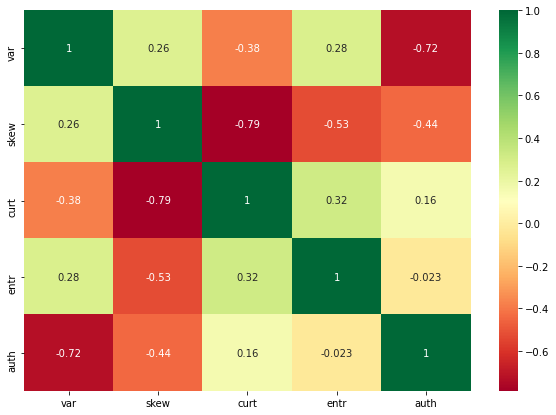

In [68]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,7))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

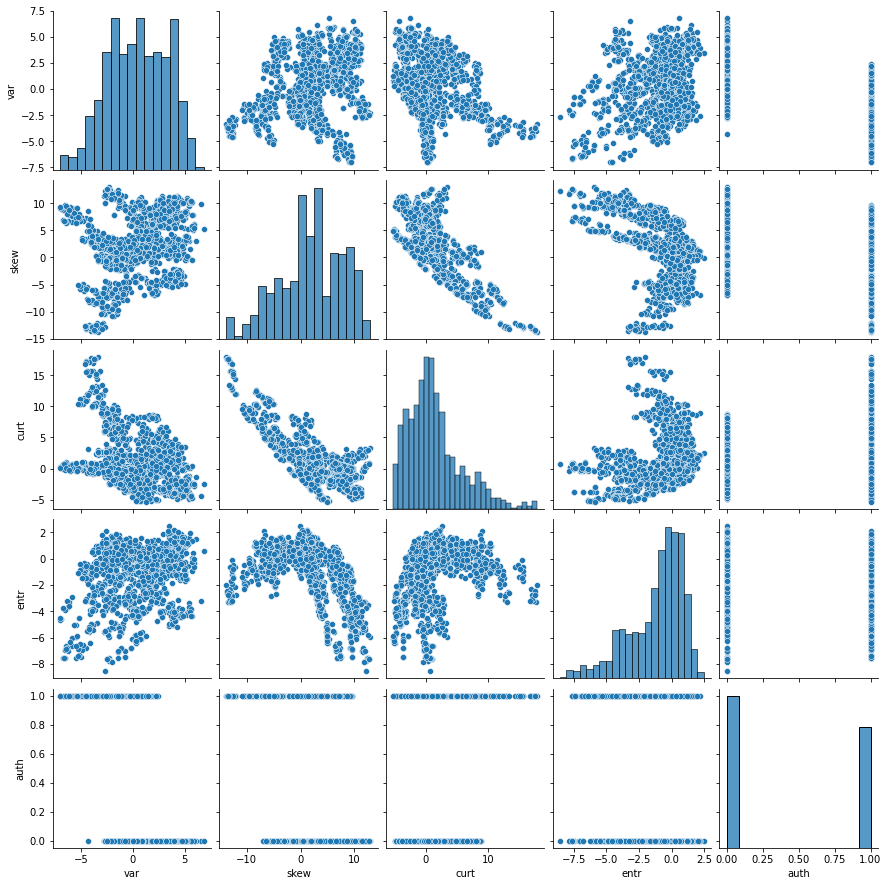

In [69]:
sns.pairplot(data=df)

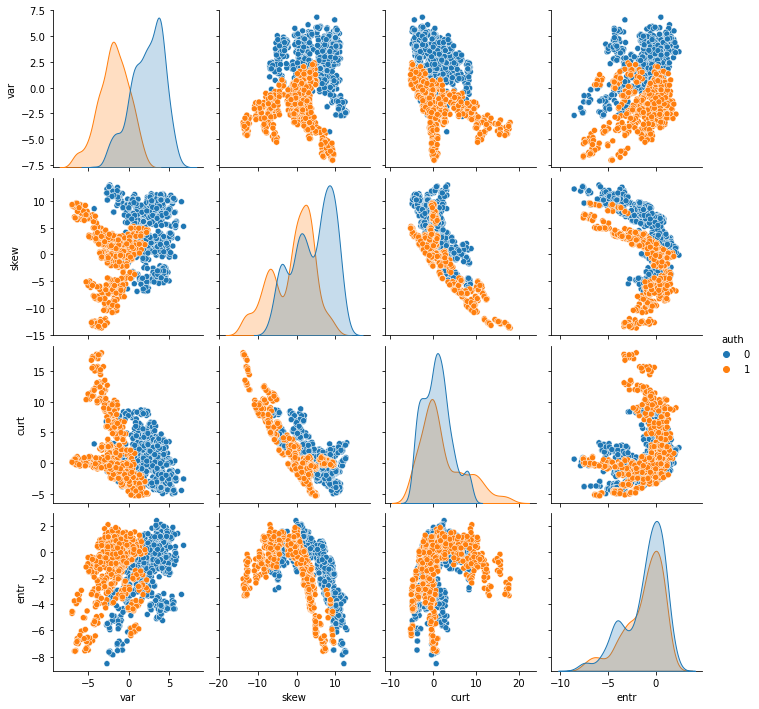

In [70]:
sns.pairplot(df, hue='auth')
plt.show()

From this pair plot we can make several interesting observations:

The distribution of both variance and skewness appears to be quite different for the two target characteristics, while kurtosis and entropy appear to be more similar.

There are clear linear and nonlinear trends in the input features.

Some characteristics seem to be correlated.

Some features seem to separate genuine and fake banknotes quite well.

Now let’s check if our data is balanced against the target values:

<ipython-input-8-0c0e6b066b3f>:5: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=target_count[0], xy=(-0.04,10+target_count[0]), size=14)
<ipython-input-8-0c0e6b066b3f>:6: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=target_count[1], xy=(0.96,10+target_count[1]), size=14)


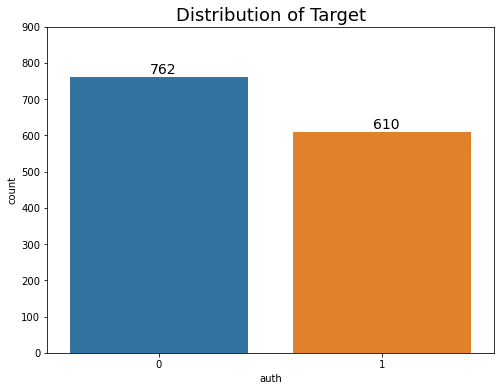

In [8]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Target', size=18)
sns.countplot(x=df['auth'])
target_count = df.auth.value_counts()
plt.annotate(s=target_count[0], xy=(-0.04,10+target_count[0]), size=14)
plt.annotate(s=target_count[1], xy=(0.96,10+target_count[1]), size=14)
plt.ylim(0,900)
plt.show()

The dataset is fairly balanced, but for the binary classification task, we need to balance it perfectly. So let’s start preprocessing the data by doing just that.

# Data Processing

#Now we need to balance our data, the easiest way to do this is to randomly drop a number of instances of the overrepresented target function. This is called random undersampling.

Otherwise, we could also create new synthetic data for the under-represented target class. This is called oversampling. For now, let’s start by randomly deleting 152 observations of actual banknotes:

In [9]:
nb_to_delete = target_count[0] - target_count[1]
df = df.sample(frac=1, random_state=42).sort_values(by='auth')
df = df[nb_to_delete:]
print(df['auth'].value_counts())

1    610
0    610
Name: auth, dtype: int64


Now we have a perfectly balanced dataset. Next, we need to divide the data into training and test sets:

# Split The Data in Train & Test

In [11]:
from sklearn.model_selection import train_test_split
x = df.loc[:, df.columns != 'auth']
y = df.loc[:, df.columns == 'auth']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

Now I will standardize the data by using the StandardScalar method provided by Scikit-learn:

In [12]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(xtrain)
xtrain = scalar.transform(xtrain)
xtest = scalar.transform(xtest)


# Training and Evaluating Machine Learning Model

# Logistic Regression

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Logistic Regression ACCURACY:  0.9877049180327869
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       114
           1       0.98      1.00      0.99       130

    accuracy                           0.99       244
   macro avg       0.99      0.99      0.99       244
weighted avg       0.99      0.99      0.99       244



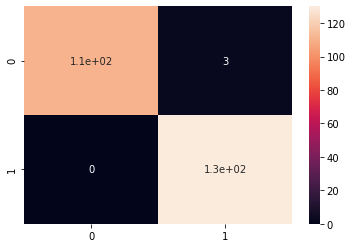

In [76]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
#fitting data to LR model
model.fit(xtrain,ytrain)
#testing on test dataset
ypred=model.predict(xtest)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
acc=accuracy_score(ytest,ypred)
print("Logistic Regression ACCURACY: ",acc)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

# ROC & AUC

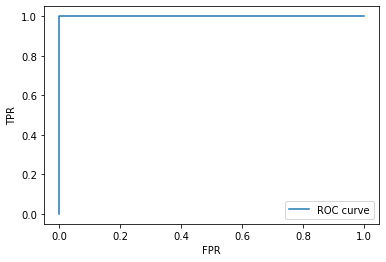

In [77]:
from sklearn import metrics
#probability of positive class
y_pred_prob=model.predict_proba(xtest)[:,1]
fpr,tpr,_=metrics.roc_curve(ytest,y_pred_prob)
auc=metrics.roc_auc_score(ytest,y_pred_prob)
plt.plot(fpr,tpr,label="ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()

In [78]:
auc

1.0

# Tuning HyperParameters of Logistic Regression

In [79]:
#estimator
model=LogisticRegression()
#parameter grid
grid=[{"penalty":["l1""l2","elasticnet","none"],
      "C":np.logspace(-4,4,20),
      "solver":["lbfgs","newton-cg","liblinear","sag","saga"],
      "max_iter":[100,1000,2500,5000]
      }
]
#grid Search cv

from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(model,param_grid=grid,cv=3,verbose=True,n_jobs=-1)
res=grid_cv.fit(xtrain,ytrain)
print(res.best_score_)
print(res.best_params_)

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits
0.9877017461066542
{'C': 0.0001, 'max_iter': 100, 'penalty': 'none', 'solver': 'saga'}


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ...        nan 0.98463112 0.98565676]
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Logistic Regression Model accuracy is : 0.9959016393442623
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       114
           1       0.99      1.00      1.00       130

    accuracy                           1.00       244
   macro avg       1.00      1.00      1.00       244
weighted avg       1.00      1.00      1.00       244



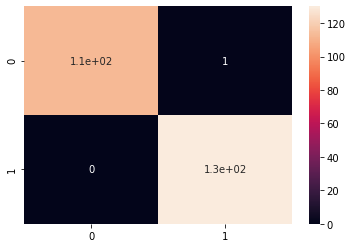

In [80]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(C=0.0001, max_iter= 100, penalty= 'none', solver= 'saga')
#fitting data to LR model
model.fit(xtrain,ytrain)
#testing on test dataset
ypred=model.predict(xtest)
#Model Evaluation 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
LR=accuracy_score(ytest,ypred)
print("Logistic Regression Model accuracy is :",LR)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

# KNearestNeighbors

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy is: 0.9959016393442623
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       114
           1       0.99      1.00      1.00       130

    accuracy                           1.00       244
   macro avg       1.00      1.00      1.00       244
weighted avg       1.00      1.00      1.00       244



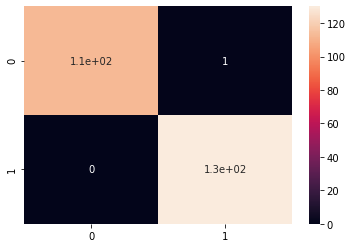

In [81]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
#fitting data to KNeighborsClassifier model
model.fit(xtrain,ytrain)
#testing on test dataset
ypred=model.predict(xtest)
#Model Evaluation 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
acc=accuracy_score(ytest,ypred)
print("Accuracy is:",acc)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

# Tuning HyperParameters of KNN

In [82]:
#estimator
model=KNeighborsClassifier()
#parameter
n_neighbors=range(1,31)
metric=["euclidean","manhattan","minkowski"]
weights=["uniform","distance"]
#parameter grid
grid={"n_neighbors":n_neighbors,"metric":metric,"weights":weights}

#cross validation
from sklearn.model_selection import RepeatedStratifiedKFold
kfold_cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=0)

#grid Search cv

from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=kfold_cv,scoring="accuracy",n_jobs=1)
res=grid_cv.fit(xtrain,ytrain)
print(res.best_score_)
print(res.best_params_)

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed 

1.0
{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN Model accuracy is : 0.9959016393442623
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       114
           1       0.99      1.00      1.00       130

    accuracy                           1.00       244
   macro avg       1.00      1.00      1.00       244
weighted avg       1.00      1.00      1.00       244



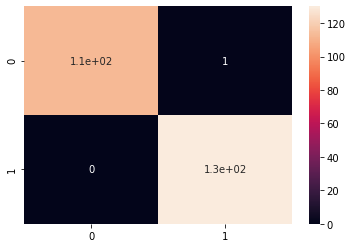

In [83]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=1,metric='euclidean',weights='uniform')
#fitting data to KNN model
model.fit(xtrain,ytrain)
#testing on test dataset 
ypred=model.predict(xtest)
#Model Evaluation 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
KNN=accuracy_score(ytest,ypred)
print("KNN Model accuracy is :",KNN)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

# Naive Bayes

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Naive Bayes Model Accuracy is: 0.8401639344262295
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       114
           1       0.85      0.85      0.85       130

    accuracy                           0.84       244
   macro avg       0.84      0.84      0.84       244
weighted avg       0.84      0.84      0.84       244



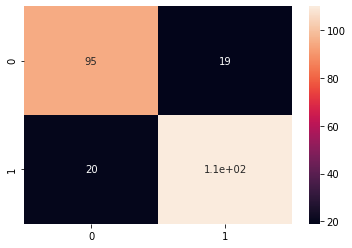

In [84]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
#fitting data to Naive Bayes model
model.fit(xtrain,ytrain)
#testing on test dataset 
ypred=model.predict(xtest)
#Model Evaluation 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
NB=accuracy_score(ytest,ypred)
print("Naive Bayes Model Accuracy is:",NB)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

# Support Vector Machine

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of model is: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00       130

    accuracy                           1.00       244
   macro avg       1.00      1.00      1.00       244
weighted avg       1.00      1.00      1.00       244



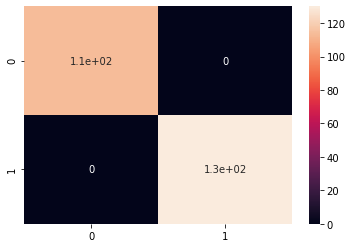

In [85]:
from sklearn.svm import SVC
model=SVC()
#fitting data to Support Vector Machine model
model.fit(xtrain,ytrain)
#testing on test dataset
ypred=model.predict(xtest)
#Model Evaluation 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
acc=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
print("Accuracy of model is:",acc)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

# Tuning HyperParameters of Support Vector Machine

In [86]:
#tunning of svm hyper parameter
#model
model=SVC()

#parameter
kernel=["linear","poly","rbf","sigmoid"]
C=[100,50,10,1,0.1,0.01]
gamma=["scale","auto"]

#grid
grid={"kernel":kernel,"C":C,"gamma":gamma}

#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=1)

#grid Search cv

from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring="accuracy")

#result
res=grid_cv.fit(xtrain,ytrain)
print(res.best_score_)
print(res.best_params_)

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

1.0
{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Support Vector Machine Model accuracy is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00       130

    accuracy                           1.00       244
   macro avg       1.00      1.00      1.00       244
weighted avg       1.00      1.00      1.00       244



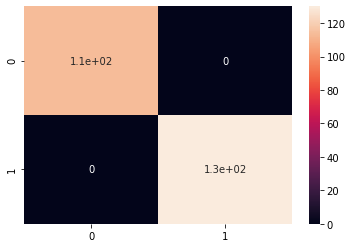

In [87]:
from sklearn.svm import SVC
model=SVC(C= 100, gamma= 'scale', kernel= 'rbf')
#fitting data to SVM model
model.fit(xtrain,ytrain)
#testing on test dataset 
ypred=model.predict(xtest)
#Model Evaluation 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
SVM=accuracy_score(ytest,ypred)
print("Support Vector Machine Model accuracy is :",SVM)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

# Decision Tree

Accuracy is: 0.9754098360655737
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       114
           1       0.97      0.98      0.98       130

    accuracy                           0.98       244
   macro avg       0.98      0.97      0.98       244
weighted avg       0.98      0.98      0.98       244



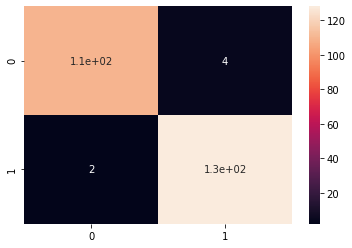

In [88]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
#fitting data to Decision Tree model
model.fit(xtrain,ytrain)
#testing on test dataset
ypred=model.predict(xtest)
#Model Evaluation 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
acc=accuracy_score(ytest,ypred)
print("Accuracy is:",acc)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

# Tuning HyperParameters of Decision Tree Classifier

In [89]:
#model DT
#parameter
criterion=["gini", "entropy"]
max_depth=list(range(1,11))
#parameter grid
grid={"criterion":criterion,"max_depth":max_depth}

#CV
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)

from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring="accuracy")
res=grid_cv.fit(xtrain,ytrain)
print(res.best_score_)
print(res.best_params_)

0.9883722561189424
{'criterion': 'entropy', 'max_depth': 9}


Decision Tree Classifier Model accuracy is : 0.9754098360655737
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       114
           1       0.97      0.98      0.98       130

    accuracy                           0.98       244
   macro avg       0.98      0.97      0.98       244
weighted avg       0.98      0.98      0.98       244



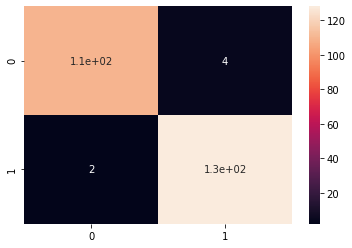

In [90]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion= 'entropy',max_depth= 9)
#fitting data to DecisionTreeClassifier model
model.fit(xtrain,ytrain)
#testing on test dataset 
ypred=model.predict(xtest)
#Model Evaluation 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
DT=accuracy_score(ytest,ypred)
print("Decision Tree Classifier Model accuracy is :",DT)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

# Random Forest Classifier

<ipython-input-91-731b5d25d360>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrain,ytrain)


Random Forest Classifier Model accuracy is : 0.9877049180327869
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       114
           1       0.98      1.00      0.99       130

    accuracy                           0.99       244
   macro avg       0.99      0.99      0.99       244
weighted avg       0.99      0.99      0.99       244



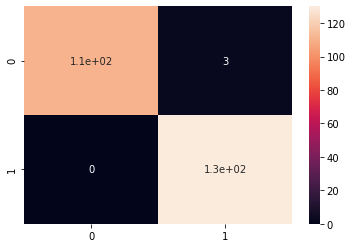

In [91]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
#fitting data to Random Forest model
model.fit(xtrain,ytrain)
#testing on test dataset 
ypred=model.predict(xtest)
#Model Evaluation 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Random Forest Classifier Model accuracy is :",accuracy_score(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

# Tuning HyperParameters of Random Forest

In [92]:
#tuning 
#parameter
max_features=["sqrt","log2"]
n_estimators=[5,10,100,1000]
grid={"max_features":max_features,"n_estimators":n_estimators}
#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3)
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=RandomForestClassifier(),param_grid=grid,cv=cv,scoring="accuracy")
res=grid_cv.fit(xtrain,ytrain)
print(res.best_params_)
print(res.best_score_)

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selec

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selec

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selec

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selec

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selec

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selec

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selec

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selec

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selec

{'max_features': 'log2', 'n_estimators': 100}
0.9945262641138929


<ipython-input-93-1c96a5c2fda0>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(xtrain,ytrain)


Random Forest Model accuracy is : 0.9877049180327869
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       114
           1       0.98      1.00      0.99       130

    accuracy                           0.99       244
   macro avg       0.99      0.99      0.99       244
weighted avg       0.99      0.99      0.99       244



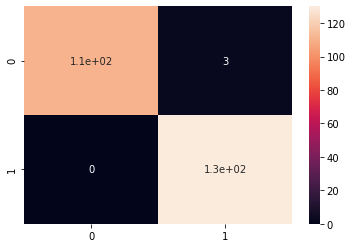

In [93]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=100,max_features='log2')
#fitting data to Random Forest model
RF.fit(xtrain,ytrain)
#testing on test dataset 
ypred=RF.predict(xtest)
#Model Evaluation 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
RF=accuracy_score(ytest,ypred)
print("Random Forest Model accuracy is :",RF)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

# Bagging Classifier

# Bagging Meta Estimator Classifier

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Bagging Meta Estimator Classifier model Accuracy:  0.9754098360655737
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       114
           1       0.98      0.98      0.98       130

    accuracy                           0.98       244
   macro avg       0.98      0.98      0.98       244
weighted avg       0.98      0.98      0.98       244



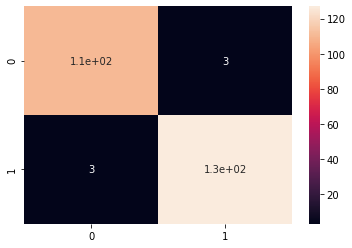

In [99]:
from sklearn.ensemble import BaggingClassifier
#making the bagging classifier with 100 decision trees
model_BMC=BaggingClassifier()
#fitting data to bagging model
model_BMC.fit(xtrain,ytrain)
#testing on test dataset 
ypred=model_BMC.predict(xtest)
#Model Evaluation 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
BMEC=accuracy_score(ytest,ypred)
print("Bagging Meta Estimator Classifier model Accuracy: ",BMEC)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

# BOOSTING Classifier

# Adaboost Classifier

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoost Model Accuracy is: 0.9918032786885246
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       114
           1       0.98      1.00      0.99       130

    accuracy                           0.99       244
   macro avg       0.99      0.99      0.99       244
weighted avg       0.99      0.99      0.99       244



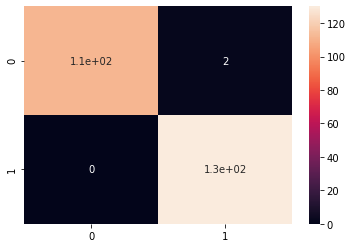

In [95]:
#Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()
#fitting data to Adaboost Classifier model
model.fit(xtrain,ytrain)
#testing on test dataset
ypred=model.predict(xtest)
#Model Evaluation 
Adaboost=accuracy_score(ytest,ypred)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("AdaBoost Model Accuracy is:",Adaboost)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

# Gradient Boosting Classifier

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Gradient Boosting Model Accuracy is: 0.9918032786885246
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       114
           1       0.98      1.00      0.99       130

    accuracy                           0.99       244
   macro avg       0.99      0.99      0.99       244
weighted avg       0.99      0.99      0.99       244



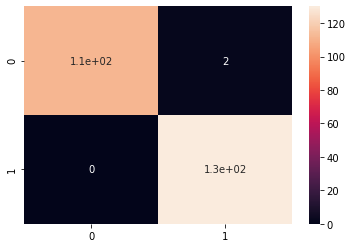

In [96]:
 from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
#fitting data to Gradientboosting Classifier model
model.fit(xtrain,ytrain)
#testing on test dataset
ypred=model.predict(xtest)
#Model Evaluation 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
Gradientboost=accuracy_score(ytest,ypred)
print("Gradient Boosting Model Accuracy is:",Gradientboost)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

# XGBoostClassifier

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[19:41:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


XGBoost Model Accuracy is: 0.9959016393442623
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       114
           1       0.99      1.00      1.00       130

    accuracy                           1.00       244
   macro avg       1.00      1.00      1.00       244
weighted avg       1.00      1.00      1.00       244



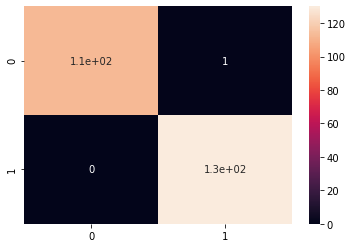

In [97]:
from xgboost import XGBClassifier
model=XGBClassifier()
#fitting data to XGboosting Classifier model
model.fit(xtrain,ytrain)
#testing on test dataset
ypred=model.predict(xtest)
#Model Evaluation
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
XGboost=accuracy_score(ytest,ypred)
print("XGBoost Model Accuracy is:",XGboost)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

In [101]:
models = [('Logistic Regression', LR.mean()),
    ('KNearest Neighbors', KNN.mean()),
    ('Naive Bayes Accuracy', NB.mean()),
    ('Support Vector Classifier Accuracy', SVM.mean()),
    ('Decision Tree Classifier Accuracy', DT.mean()),
    ('Bagging Meta Estimator Classifier Accuracy', BMEC.mean()),
    ('Random Forest Classifier Accuracy', RF.mean()),
    ('AdaBoosting Classifier Accuracy', Adaboost.mean()),
    ('Gradient Boosting Classifier Accuracy', Gradientboost.mean()),
    ('XGBoosting Classifier Accuracy', XGboost.mean())]

In [102]:
predict = pd.DataFrame(data = models, columns=['Model', 'Accuracy'])
predict

,Model,Accuracy
0,Logistic Regression,0.995902
1,KNearest Neighbors,0.995902
2,Naive Bayes Accuracy,0.840164
3,Support Vector Classifier Accuracy,1.000000
4,Decision Tree Classifier Accuracy,0.975410
5,Bagging Meta Estimator Classifier Accuracy,0.975410
6,Random Forest Classifier Accuracy,0.987705
7,AdaBoosting Classifier Accuracy,0.991803
8,Gradient Boosting Classifier Accuracy,0.991803
9,XGBoosting Classifier Accuracy,0.995902


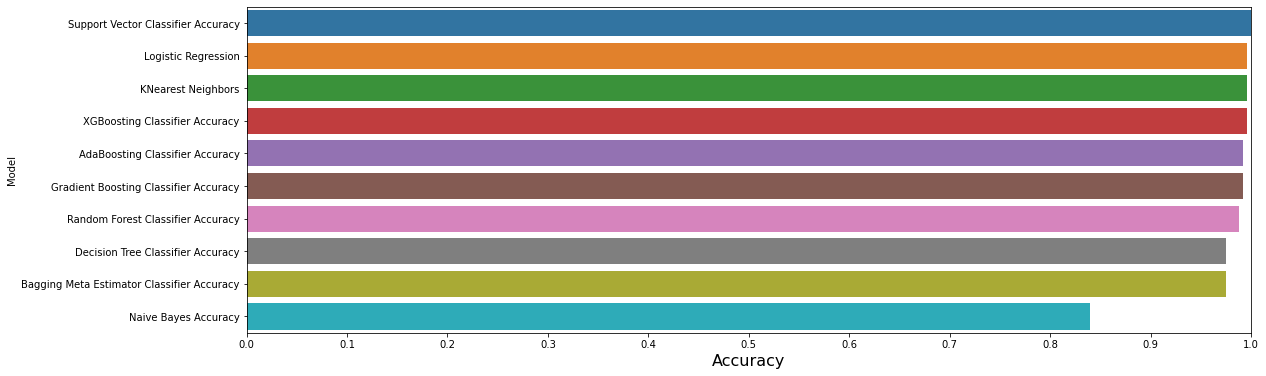

In [103]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Accuracy', y='Model', data = predict, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Accuracy', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

From above the graph we can see the SVM model accuracy is 100%.So we choose this model to predict our new data.

Now let’s simulate the prediction of a single banknote. All we need to do is extract the features, scale them, and integrate them into our pre-trained model. We can also inspect the banknote probabilities of belonging to each target class:

# Predicting for new data

In [16]:
from sklearn.svm import SVC
clf=SVC(C= 100, gamma= 'scale', kernel= 'rbf')
clf.fit(xtrain, ytrain.values.ravel())

SVC(C=100)

In [18]:
from sklearn.metrics import confusion_matrix
y_pred = np.array(clf.predict(xtest))
conf_mat = pd.DataFrame(confusion_matrix(ytest, y_pred),
                        columns=["Pred.Negative", "Pred.Positive"],
                        index=['Act.Negative', "Act.Positive"])
tn, fp, fn, tp = confusion_matrix(ytest, y_pred).ravel()
accuracy = round((tn+tp)/(tn+fp+fn+tp), 4)
print(conf_mat)
print(f'\n Accuracy = {round(100*accuracy, 2)}%')

              Pred.Negative  Pred.Positive
Act.Negative            114              0
Act.Positive              0            130

 Accuracy = 100.0%


In [29]:
from sklearn.preprocessing import StandardScaler
new_banknote = np.array([3.6216, 8.6661, -2.8073, -0.44699], ndmin=2)
new_banknote = scalar.transform(new_banknote)
print(f'Prediction:(Class 0 =Real Note & Class 1 =Fake Note) Result Class=  {clf.predict(new_banknote)[0]}')

Prediction:(Class 0 =Real Note & Class 1 =Fake Note) Result Class=  0


# Our Model Predicts That This Bank Note is Real

In [30]:
from sklearn.preprocessing import StandardScaler
new_banknote = np.array([4.5, -8.1, 2.4, 1.4], ndmin=2)
new_banknote = scalar.transform(new_banknote)
print(f'Prediction:(Class 0 =Real Note & Class 1 =Fake Note) Result Class=  {clf.predict(new_banknote)[0]}')

Prediction:(Class 0 =Real Note & Class 1 =Fake Note) Result Class=  1


# Our Model Predicts That This Bank Note is Fake

# Conclusion 

In this kernel, I have built 10 Classification models using Fake_Currency_Detection Dataset. These are Logistic Regression, 
KNearest Neighbor, Naive Bayes, Support Vector Classifie, Decision Tree, Bagging Meta Estimator, Random Forest, AdaBoosting,
XGBoost,GradientBoost. Then measured and visualized the performance of the models.we can see the SVM model accuracy is 100%.
By using this model,we predict a bank note that give us result as this note is Fake or Real...


# Thank You